In [4]:
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [5]:
df = pd.read_csv('complete_flight_info_and weather_data.csv')

# convert flight date to date object
df = df.drop(['date', 'date.1','CRS_DEP_TIME','ORIGIN','DEST'], axis=1)

df = df.dropna()
 
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
del df['DOT_CODE']
# Remove columns starting with 'origin' and 'dest'
columns_to_remove = [col for col in df.columns if col.startswith('ORIGIN') or col.startswith('DEST')]
df = df.drop(columns=columns_to_remove)

# converts string TRUE/FALSE to boolean
df.replace({'TRUE': True, 'FALSE': False}, inplace=True)

# convert FL_Date to year, month, day
df['FL_YEAR'] = pd.to_datetime(df['FL_DATE']).dt.year
df['FL_MONTH'] = pd.to_datetime(df['FL_DATE']).dt.month
df['FL_DAY'] = pd.to_datetime(df['FL_DATE']).dt.day

# drop original date time
df.drop(columns=['FL_DATE'], inplace=True)


In [6]:
y = df['ARR_DELAY']
X = df.drop(['ARR_DELAY'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=156)



In [7]:
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=156, max_features=30)

model_gb.fit(X_train, y_train)
preds_test = model_gb.predict(X_test)

print(mean_squared_error(y_test, preds_test), r2_score(y_test, preds_test))

77.67842042201127 0.9935085785415165


In [8]:
mse = {'k':[], 'train_mse':[], 'test_mse':[], 'n':[]}

for n in range(5,10,1):
    print("Fit with n_estimators:", n, end='\r', flush=True)
    
    model_gb = GradientBoostingRegressor(n_estimators=n, random_state=156)
    model_gb = model_gb.fit(X_train, y_train)
    preds_train = model_gb.predict(X_train)
    preds_test = model_gb.predict(X_test)
    
    mse['n'].append(n)
    mse['train_mse'].append(mean_squared_error(y_train, preds_train))
    mse['test_mse'].append(mean_squared_error(y_test, preds_test))
    
idx = mse['test_mse'].index(min(mse['test_mse']))
print('Boosting model yielding optimized test MSE has n_estimators:', mse['n'][idx])
print('Optimized model has MSE:', min(mse['test_mse'])/22)

Boosting model yielding optimized test MSE has n_estimators: 9
Optimized model has MSE: 92.00111873340516


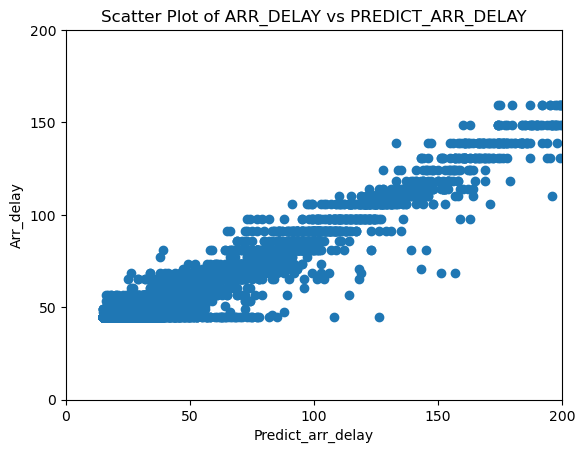

In [30]:
# Create the scatter plot
plt.scatter(y_test, preds_test)

plt.ylabel('ARR_DELAY'.capitalize())
plt.yticks([0, 50, 100, 150, 200], ['0', '50', '100', '150', '200'])

plt.xlabel('PREDICT_ARR_DELAY'.capitalize())
plt.xticks([0, 50, 100, 150, 200], ['0', '50', '100', '150', '200'])

plt.xlim([0, 200])
plt.ylim([0, 200])

plt.title('Scatter Plot of ARR_DELAY vs PREDICT_ARR_DELAY')

plt.show()